# Diabetes Detection with Artificial Neural Network (PIMA Indians Dataset)

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df['Outcome_labels'] = np.where(df['Outcome'] == 1, 'Diabetic','No Diabetic')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_labels
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic


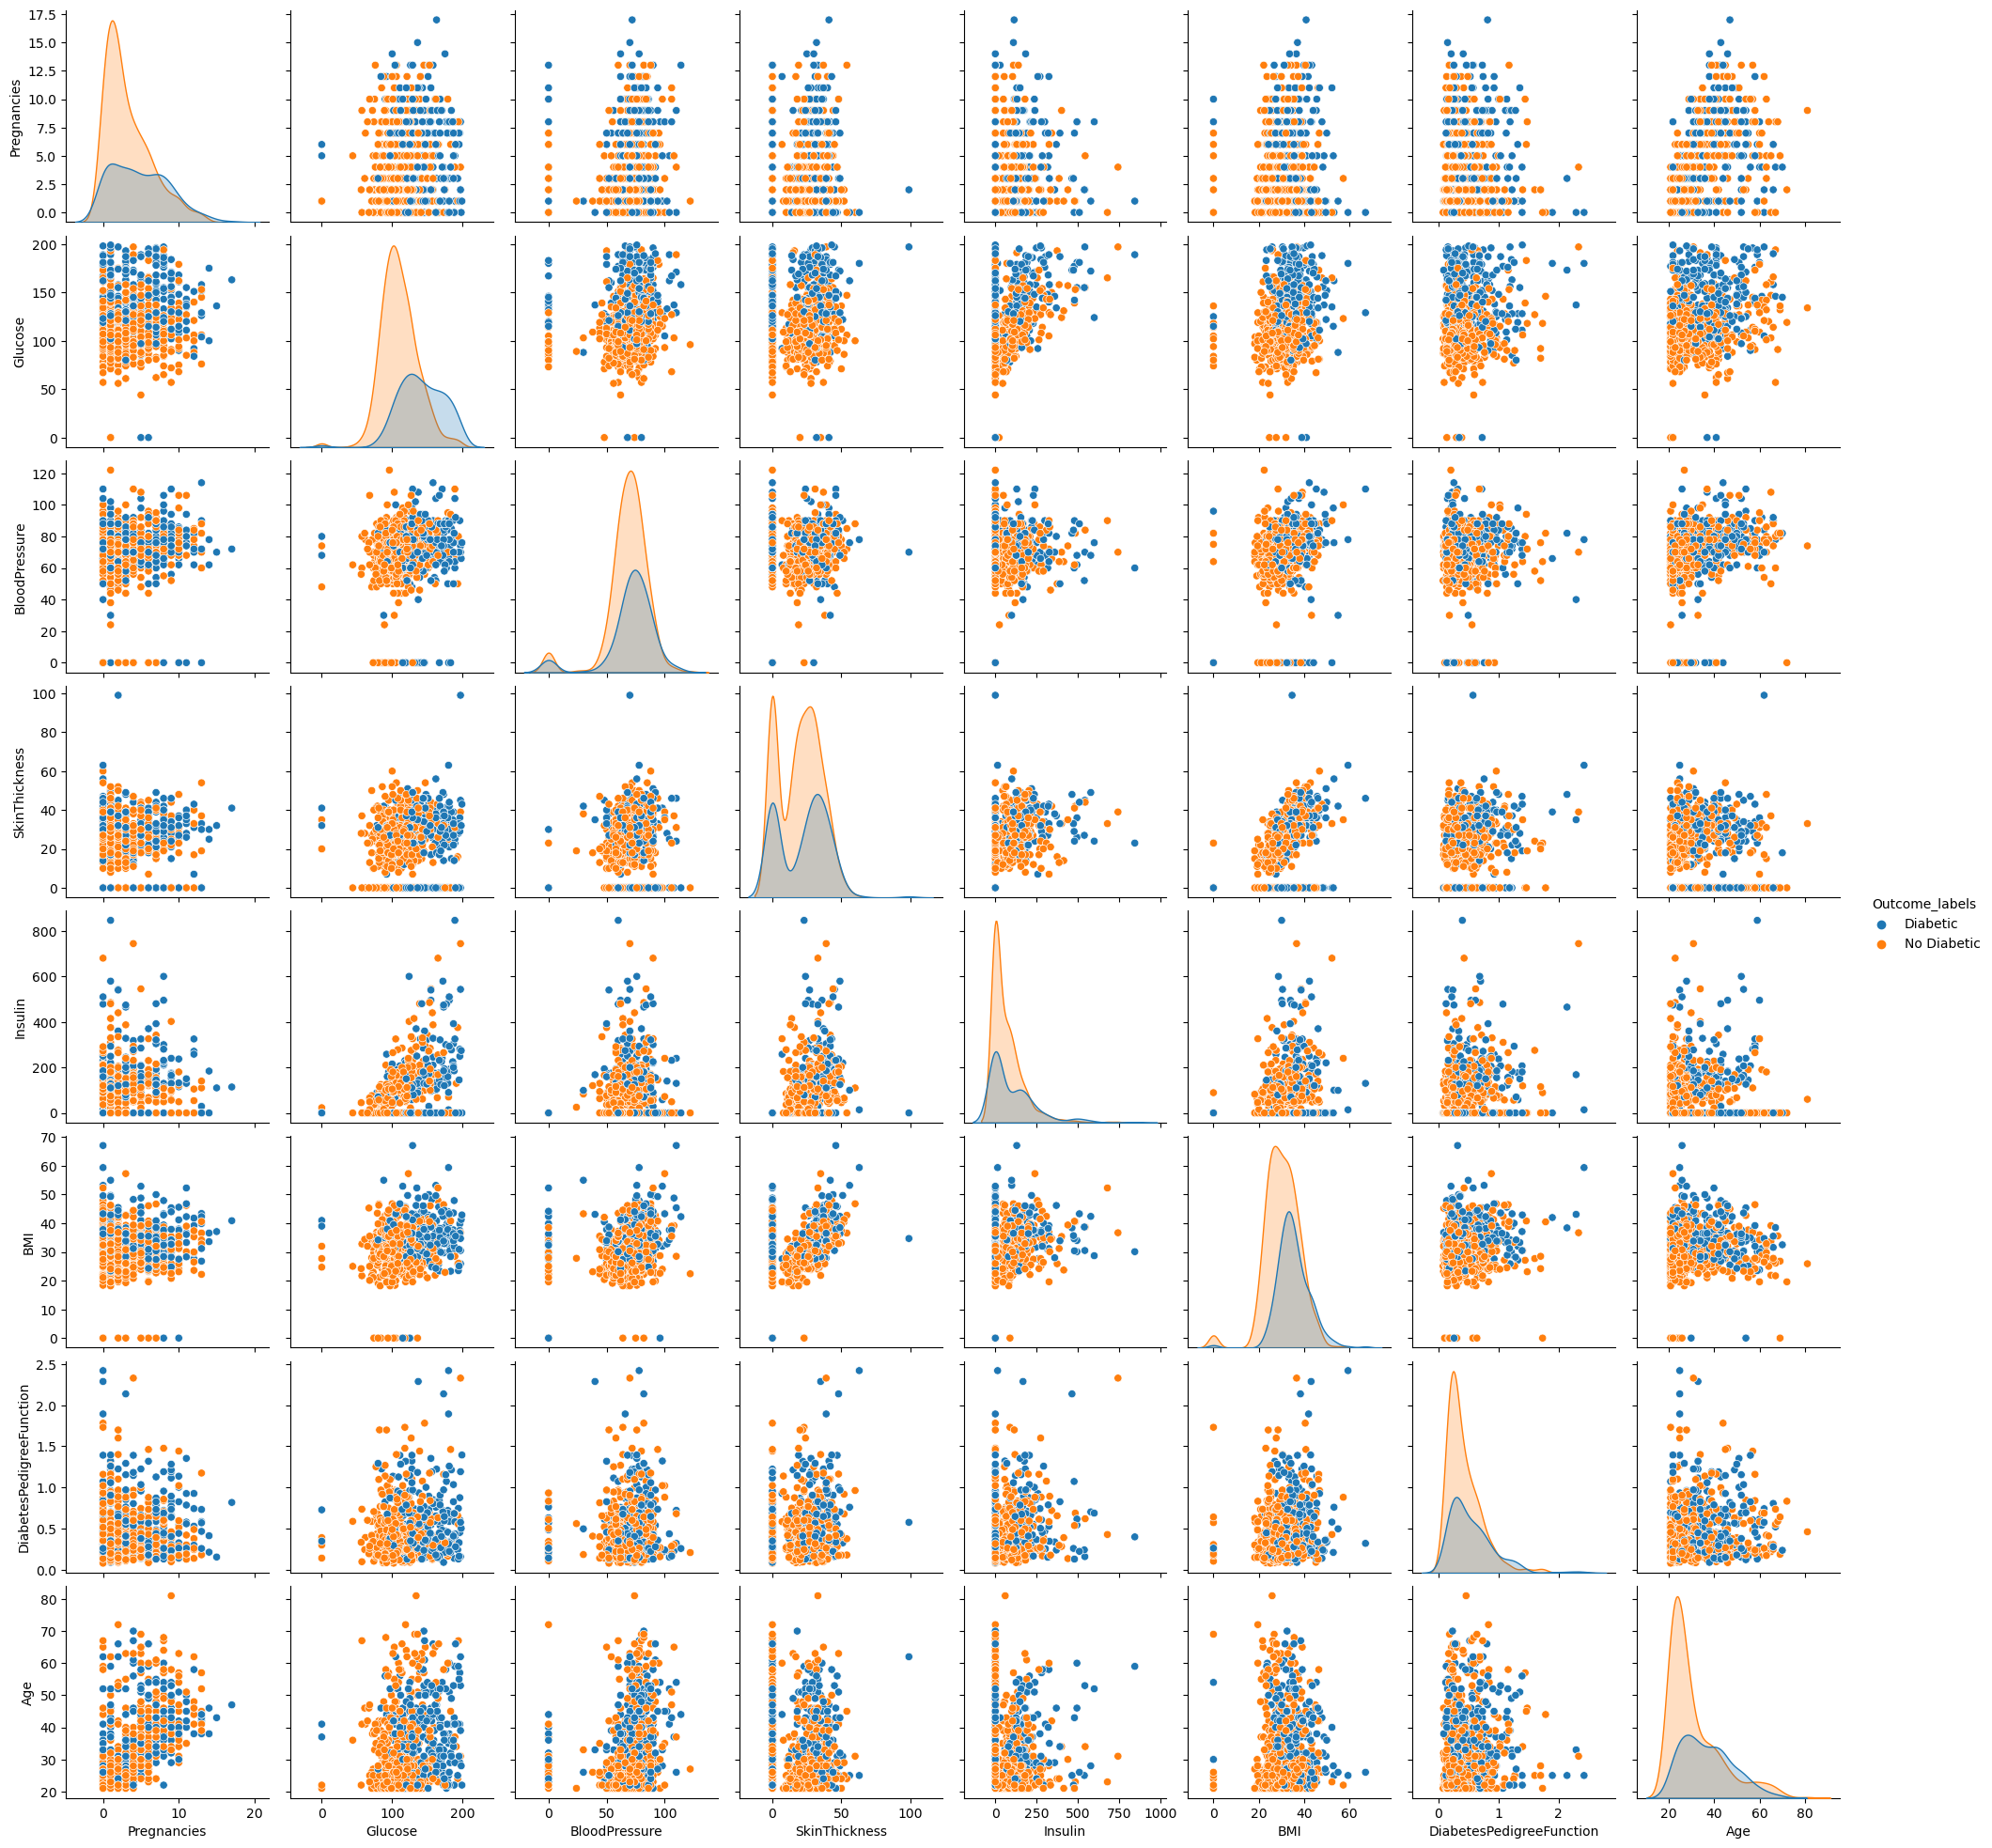

In [4]:
sns.pairplot(df.drop('Outcome',axis=1),hue='Outcome_labels')

In [5]:
X = df.drop(['Outcome','Outcome_labels'],axis=1).values
y = df['Outcome'].values

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Creating Tensors

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
df.shape

(768, 10)

### Instantiating ANN Model

In [10]:
# Model Building

class Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [11]:
torch.manual_seed(20)
model= Model()

In [12]:
model.parameters

<bound method Module.parameters of Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [13]:
# Backward Propagation - Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
epochs = 2500
final_loss = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019208312034607
Epoch number: 21 and the loss : 0.6090320944786072
Epoch number: 31 and the loss : 0.5917771458625793
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135972499847412
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.4983408749103546
Epoch number: 121 and the loss : 0.4960552752017975
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4755900204181671
Epoch number: 151 and the loss : 0.481985479593277
Epoch number: 161 and the loss : 0.4806502163410187
Epoch number: 171 and the loss : 0.4706864356994629
Epoch number: 181 and the loss : 0.4591073989868164
Epoch number: 191 and t

Epoch number: 1591 and the loss : 0.24984358251094818
Epoch number: 1601 and the loss : 0.3554530441761017
Epoch number: 1611 and the loss : 0.31640541553497314
Epoch number: 1621 and the loss : 0.281850129365921
Epoch number: 1631 and the loss : 0.25661027431488037
Epoch number: 1641 and the loss : 0.248259499669075
Epoch number: 1651 and the loss : 0.24647171795368195
Epoch number: 1661 and the loss : 0.24460330605506897
Epoch number: 1671 and the loss : 0.24286974966526031
Epoch number: 1681 and the loss : 0.24204730987548828
Epoch number: 1691 and the loss : 0.24073274433612823
Epoch number: 1701 and the loss : 0.24049708247184753
Epoch number: 1711 and the loss : 0.24151158332824707
Epoch number: 1721 and the loss : 0.2410886138677597
Epoch number: 1731 and the loss : 0.4107293486595154
Epoch number: 1741 and the loss : 0.3442067503929138
Epoch number: 1751 and the loss : 0.2725445628166199
Epoch number: 1761 and the loss : 0.26119473576545715
Epoch number: 1771 and the loss : 0.2

In [15]:
final_losses = [i.detach().numpy() for i in final_loss]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epochs')

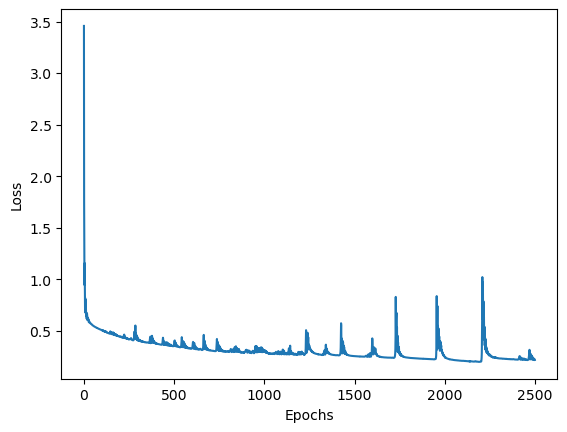

In [17]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [18]:
# Making Prediction
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[89, 18],
       [17, 30]])

Text(95.72222222222221, 0.5, 'Predicted Values')

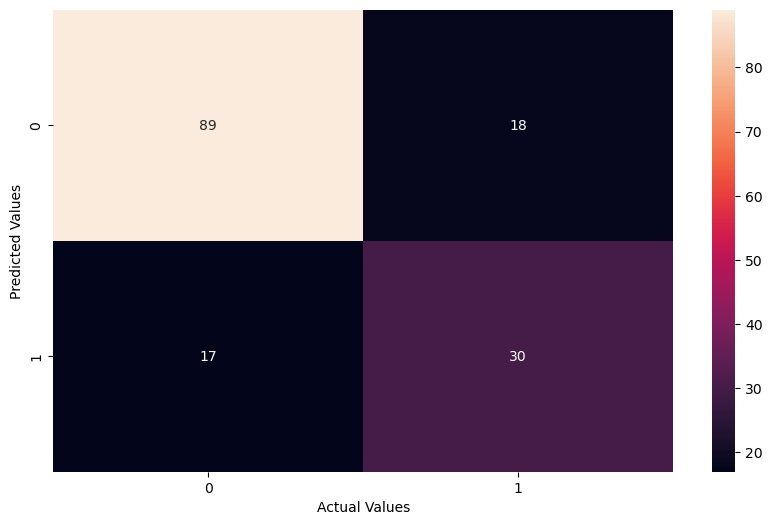

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [21]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7727272727272727

In [22]:
model.eval()

Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [23]:
list(df.iloc[0,:-1])

[6, 148, 72, 35, 0, 33.6, 0.627, 50, 1]

In [24]:
# change the data 
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [25]:
new_data = torch.tensor(lst1)

In [26]:
# predict new data

with torch.no_grad():
    new_pred = model(new_data)
    print(new_pred)
    print(new_pred.argmax().item())

tensor([1.6318, 2.1028])
1


This shows that the result for these particular values Diabetes is not detected (0).